In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

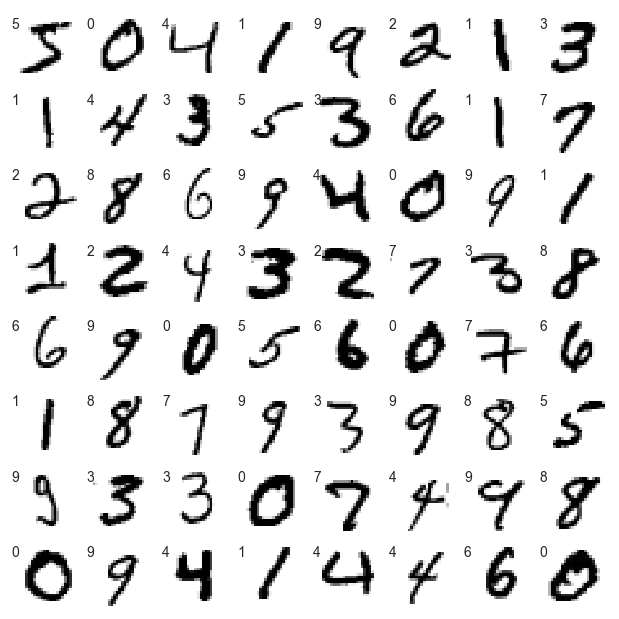

In [5]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))


In [6]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
# Hyperparameters
training_epochs = 10 # Total number of training epochs
learning_rate = 0.001 # The learning rate

In [10]:
# create a model
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 5, 5, 32)         128       
 ormalization)                                                   
                                                        

In [11]:
results = model.fit(
    X_train, y_train,
    epochs= training_epochs,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 2
)

Epoch 1/10
1875/1875 - 18s - loss: 0.0967 - accuracy: 0.9703 - val_loss: 0.0456 - val_accuracy: 0.9862 - 18s/epoch - 10ms/step
Epoch 2/10
1875/1875 - 18s - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0369 - val_accuracy: 0.9878 - 18s/epoch - 10ms/step
Epoch 3/10
1875/1875 - 16s - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0358 - val_accuracy: 0.9881 - 16s/epoch - 9ms/step
Epoch 4/10
1875/1875 - 15s - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0308 - val_accuracy: 0.9903 - 15s/epoch - 8ms/step
Epoch 5/10
1875/1875 - 16s - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0519 - val_accuracy: 0.9867 - 16s/epoch - 8ms/step
Epoch 6/10
1875/1875 - 17s - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0456 - val_accuracy: 0.9888 - 17s/epoch - 9ms/step
Epoch 7/10
1875/1875 - 17s - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0446 - val_accuracy: 0.9887 - 17s/epoch - 9ms/step
Epoch 8/10
1875/1875 - 16s - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0467 - val_accuracy: 0.9880 - 16s/epoch -

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0449 - accuracy: 0.9911


[0.04487835243344307, 0.991100013256073]

In [13]:
prediction_values = model.predict(X_test, max_queue_size=1)

313/313 [==============================] - 1s 3ms/step


In [14]:
print(prediction_values[2])

[8.0991390e-16 9.9999952e-01 2.2609348e-11 6.5580968e-19 5.2351993e-07
 8.6834165e-14 1.5435706e-12 4.8920734e-10 9.0872821e-12 3.1304049e-15]


In [15]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0041, accuracy: 99.8550%
Evaluating on testing set...
loss=0.0449, accuracy: 99.1100%


Maximum Loss : 0.0967
Minimum Loss : 0.0073
Loss difference : 0.0893


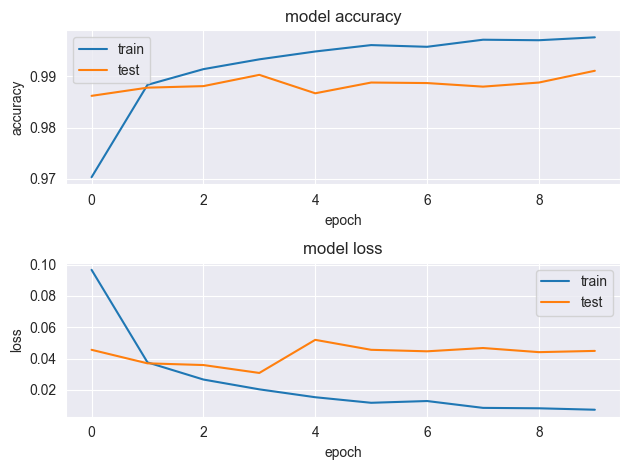

In [16]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

По графиками видно что оптимальное количество епох 2, дальше растёт количество потерь и падает accuracy. Пересоздаём модель с меньшшим количеством эпох.

In [17]:
# Hyperparameters
training_epochs = 2 # Total number of training epochs
learning_rate = 0.001 # The learning rate

In [18]:
# create a model
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 5, 5, 32)         128       
 hNormalization)                                                 
                                                      

In [19]:
results = model.fit(
    X_train, y_train,
    epochs= training_epochs,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 2
)

Epoch 1/2
1875/1875 - 17s - loss: 0.0921 - accuracy: 0.9716 - val_loss: 0.0506 - val_accuracy: 0.9827 - 17s/epoch - 9ms/step
Epoch 2/2
1875/1875 - 16s - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0394 - val_accuracy: 0.9885 - 16s/epoch - 8ms/step


In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9885


[0.039435163140296936, 0.9884999990463257]

In [21]:
prediction_values = model.predict(X_test, max_queue_size=1)

313/313 [==============================] - 1s 3ms/step


Text(0.5, 23.52222222222222, 'Predicted')

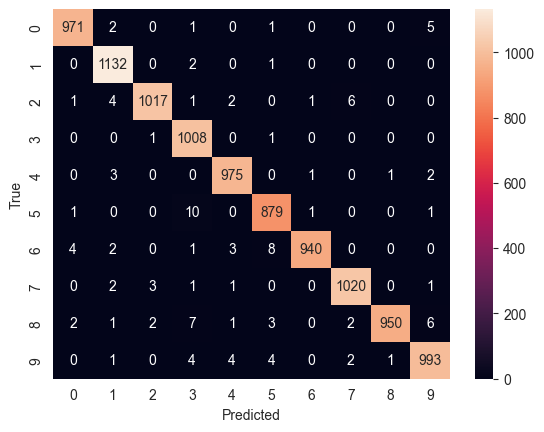

In [22]:
Y_true = np.argmax(y_test,axis = 1)
pred_values = np.argmax(prediction_values,axis = 1)
confusion_mtx = confusion_matrix(Y_true, pred_values)
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')